# ***THÊM THƯ VIỆN***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD



# ***CONNECT TO DRIVE***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ***PREPROCESSING***

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/CuoiKi2/train',target_size = (32,32),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/CuoiKi2/val',target_size = (32,32),batch_size = 12,class_mode = 'categorical')

Found 3030 images belonging to 15 classes.
Found 748 images belonging to 15 classes.


# ***CREATE MODEL***

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(15))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# ***RUN MODEL***

In [ ]:
history = model.fit(train_set,batch_size=128,epochs=10,verbose=1,validation_data=test_set)

Epoch 1/10
253/253 [==============================] - 157s 622ms/step - loss: 0.1941 - accuracy: 0.9449 - val_loss: 0.8797 - val_accuracy: 0.7326
Epoch 2/10
253/253 [==============================] - 157s 622ms/step - loss: 0.1767 - accuracy: 0.9492 - val_loss: 0.8804 - val_accuracy: 0.7487
Epoch 3/10
253/253 [==============================] - 157s 619ms/step - loss: 0.1722 - accuracy: 0.9403 - val_loss: 0.7552 - val_accuracy: 0.7781
Epoch 4/10
253/253 [==============================] - 157s 621ms/step - loss: 0.1716 - accuracy: 0.9492 - val_loss: 0.8604 - val_accuracy: 0.7647
Epoch 5/10
253/253 [==============================] - 156s 617ms/step - loss: 0.1418 - accuracy: 0.9591 - val_loss: 0.7300 - val_accuracy: 0.7955
Epoch 6/10
253/253 [==============================] - 158s 624ms/step - loss: 0.1219 - accuracy: 0.9663 - val_loss: 0.7424 - val_accuracy: 0.8088
Epoch 7/10
253/253 [==============================] - 157s 619ms/step - loss: 0.1277 - accuracy: 0.9627 - val_loss: 0.7512 -

# ***SAVE MODEL***

In [ ]:
model.save('neural.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('/content/drive/MyDrive/neural.h5')

# ***CREATE CLASS***

In [ ]:
def predict(result):
  if round(result[0][0])==1:
    print("cá ali đầu bò")
  elif round(result[0][1])==1:
    print("cá ba đuôi")
  elif round(result[0][2])==1:
    print("cá bắp nẻ xanh")
  elif round(result[0][3])==1:
    print("cá beta trắng")  
  elif round(result[0][4])==1:
    print("cá chim sâu") 
  elif round(result[0][5])==1:
    print("cá gamma hoàng gia")
  elif round(result[0][6])==1:
    print("cá hề")
  elif round(result[0][7])==1:
    print("cá la hán")  
  elif round(result[0][8])==1:
    print("cá lau kính") 
  elif round(result[0][9])==1:
    print("cá mó tím")
  elif round(result[0][10])==1:
    print("cá ngựa")
  elif round(result[0][11])==1:
    print("cá thù lù")
  elif round(result[0][12])==1:
    print("cá trạng nguyên")
  elif round(result[0][13])==1:
    print("cá đĩa")
  elif round(result[0][14])==1:
    print("cá đuôi gai vàng")


# ***TEST MODEL***

cá ali đầu bò


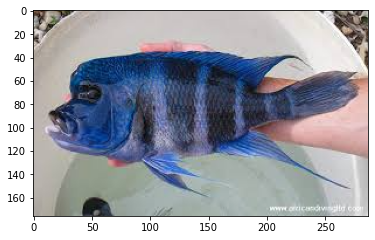

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá ali đầu bò/image (22).png',target_size=(32,32))
plt.imshow(load_img('/content/drive/MyDrive/CuoiKi/test/cá ali đầu bò/image (22).png'))
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá ali đầu bò


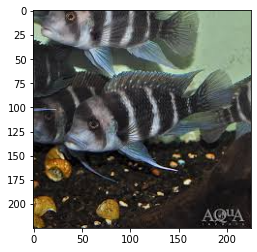

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá ali đầu bò/image (24).png',target_size=(32,32))
plt.imshow(load_img('/content/drive/MyDrive/CuoiKi/test/cá ali đầu bò/image (24).png'))
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá ba đuôi


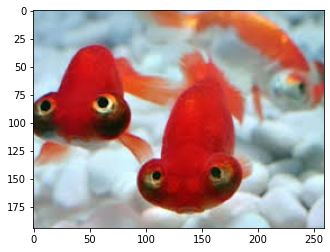

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá ba đuôi/image (22).png',target_size=(32,32))
plt.imshow(load_img('/content/drive/MyDrive/CuoiKi/test/cá ba đuôi/image (22).png'))
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá ba đuôi


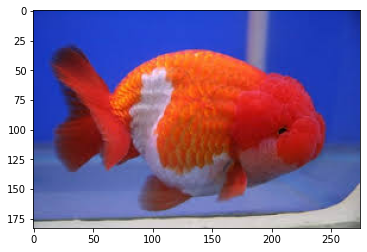

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá ba đuôi/image (25).png',target_size=(32,32))
plt.imshow(load_img('/content/drive/MyDrive/CuoiKi/test/cá ba đuôi/image (25).png'))
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá ngựa


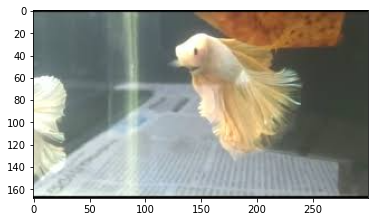

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá beta trắng/image (25).png',target_size=(32,32))
plt.imshow(load_img('/content/drive/MyDrive/CuoiKi/test/cá beta trắng/image (25).png'))
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá la hán


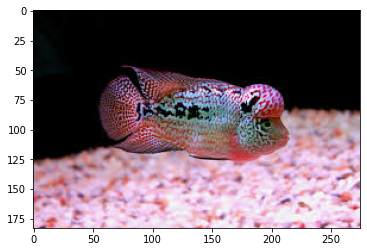

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá la hán/image (21).png',target_size=(32,32))
plt.imshow(load_img('/content/drive/MyDrive/CuoiKi/test/cá la hán/image (21).png'))
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá lau kính


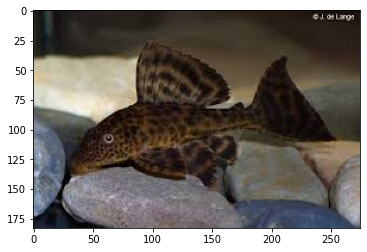

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá lau kính/image (21).png',target_size=(32,32))
plt.imshow(load_img('/content/drive/MyDrive/CuoiKi/test/cá lau kính/image (21).png'))
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá đĩa


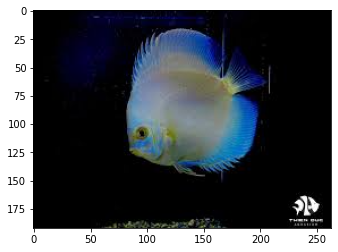

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá đĩa/image (21).png',target_size=(32,32))
plt.imshow(load_img('/content/drive/MyDrive/CuoiKi/test/cá đĩa/image (21).png'))
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

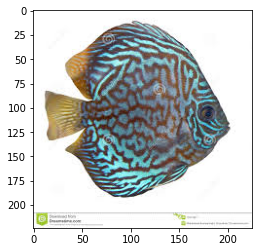

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá đĩa/image (24).png',target_size=(32,32))
plt.imshow(load_img('/content/drive/MyDrive/CuoiKi/test/cá đĩa/image (24).png'))
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá ngựa


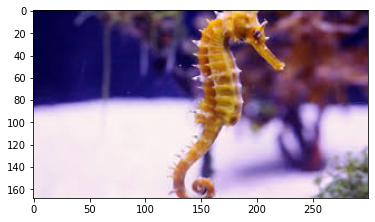

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá ngựa/image (21).png',target_size=(32,32))
plt.imshow(load_img("/content/drive/MyDrive/CuoiKi/test/cá ngựa/image (21).png"))

test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá thù lù


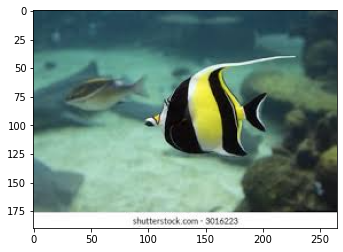

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá thù lù/image (21).png',target_size=(32,32))
plt.imshow(load_img("/content/drive/MyDrive/CuoiKi/test/cá thù lù/image (21).png"))

test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá trạng nguyên


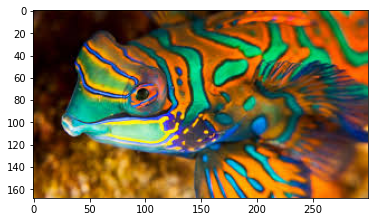

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá trạng nguyên/image (21).png',target_size=(32,32))
plt.imshow(load_img("/content/drive/MyDrive/CuoiKi/test/cá trạng nguyên/image (21).png"))

test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá đuôi gai vàng


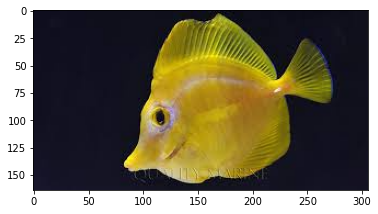

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá đuôi gai vàng/image (21).png',target_size=(32,32))
plt.imshow(load_img("/content/drive/MyDrive/CuoiKi/test/cá đuôi gai vàng/image (21).png"))

test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá mó tím


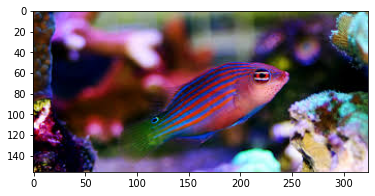

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá mó tím/image (21).png',target_size=(32,32))
plt.imshow(load_img("/content/drive/MyDrive/CuoiKi/test/cá mó tím/image (21).png"))

test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá chim sâu


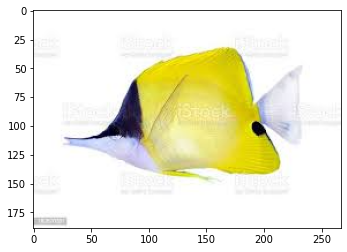

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá chim sâu/image (21).png',target_size=(32,32))
plt.imshow(load_img("/content/drive/MyDrive/CuoiKi/test/cá chim sâu/image (21).png"))

test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)

cá gamma hoàng gia


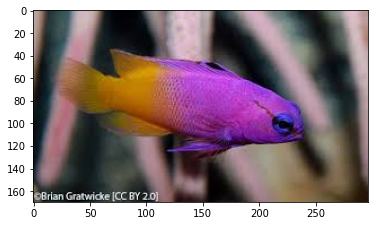

In [ ]:
test_img=load_img('/content/drive/MyDrive/CuoiKi/test/cá gamma hoàng gia/image (21).png',target_size=(32,32))
plt.imshow(load_img("/content/drive/MyDrive/CuoiKi/test/cá gamma hoàng gia/image (21).png"))

test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model1.predict(test_img)
predict(result)